# Random Walks Algorithms

In [67]:
from qiskit import *
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.gate import *
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import Gate

## Random walks

### Useful gates

In [2]:
def increment_gate(n, m=1):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(m)
    inc = QuantumCircuit(q_r, q_c)
    for i in range(n-1,0, -1):
        inc.mct(q_r[:i]+q_c[:], q_r[i])
    inc.mct(q_c[:], q_r[0])
    
    return inc.to_gate(label='INCREMENT')

In [3]:
def decrement_gate(n, m=1):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(m)
    dec = QuantumCircuit(q_r, q_c)
    
    dec.mct(q_c[:], q_r[0])
    for i in range(1,n):
        dec.mct(q_r[:i]+q_c[:], q_r[i])
        
    return dec.to_gate(label='DECREMENT')

In [4]:
def simulate(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator).result()
    counts = result.get_counts(circuit)
    return counts

In [5]:
def shift_gate(n):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(1)
    shift = QuantumCircuit(q_r, q_c)
    
    shift.x( q_c[0])
    shift.append(increment_gate(n), q_r[:] + q_c[:])
    shift.x( q_c[0])
    shift.append(decrement_gate(n), q_r[:] + q_c[:])

    
    
    return shift.to_gate(label='SHIFT')

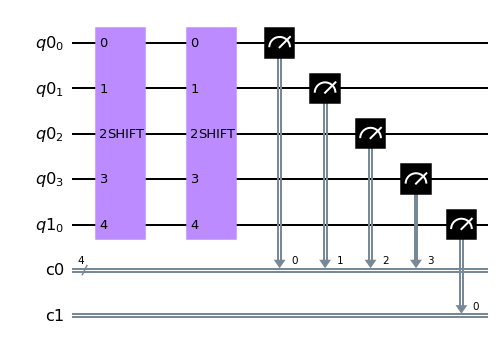

In [6]:
t = 2
n = 4
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )


for _ in range(t):
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

circuit.draw(output ='mpl')

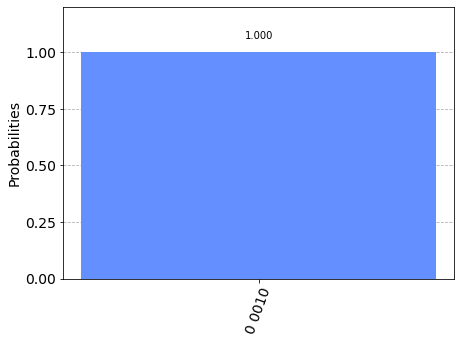

In [7]:
counts = simulate(circuit)
plot_histogram(counts)

### Circuit of Coined Walks with $|+>$ coin

In [8]:
def prob(k,u):
    if u== 0:
        if k==0 :
            return (1,0)
        return (0,0)
    A_0, B_0 = prob(k-1,u-1)
    A_1, B_1 = prob(k+1,u-1)
    return ((A_0+B_0)/2**(0.5) , (A_1-B_1)/2**(0.5))

In [55]:
def show_dec_bar(t,n,counts):
    x= range(-t, t+1)
    y= [0]*(2*t+1)
    for num in list(counts.keys()) :
        no = int(num[2:], base = 2)
        no = no if no<2**(n-1) else no-(2**n)
        y[no+t]+= counts[num]
    y=np.array(y)/sum(y)

    plt.bar(x,y, alpha = 0.3)
    #plt.show()

n= 4


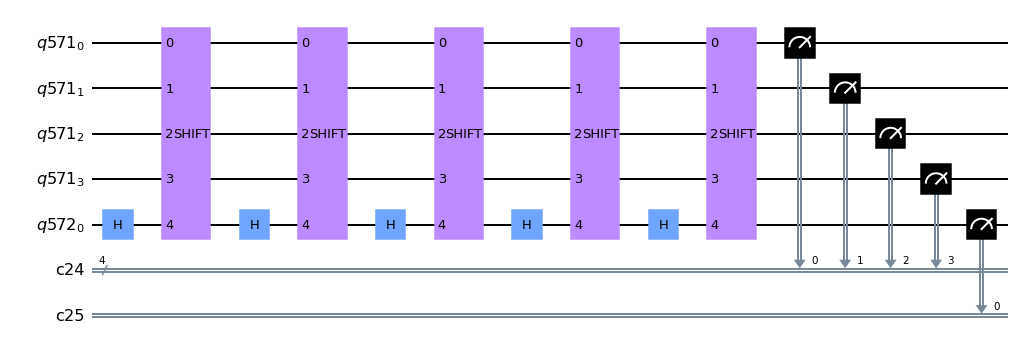

In [52]:
t = 5
n = 4
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

print('n=', n)
circuit.draw(output ='mpl')


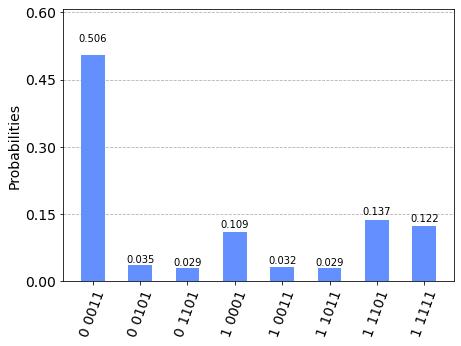

In [56]:
counts = simulate(circuit)
plot_histogram(counts)

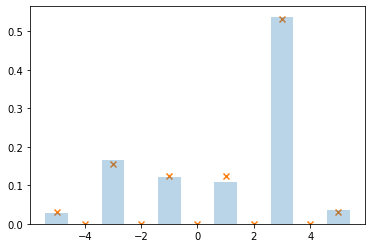

In [57]:
show_dec_bar(t,n,counts)


X=range(-t,t+1)
Y=[(prob(i,t)[0]**2 +prob(i,t)[1]**2) for i in range(-t,t+1)]

plt.scatter(X,Y, marker='x')

### Circuit of Coined Walks with $|->$ coin

In [62]:
def prob_1(k,u):
    if u== 0:
        if k==0 :
            return (1,0)
        return (0,0)
    A_0, B_0 = prob(k-1,u-1)
    A_1, B_1 = prob(k+1,u-1)
    return ((A_1-B_1)/2**(0.5), (A_0+B_0)/2**(0.5))

n= 10


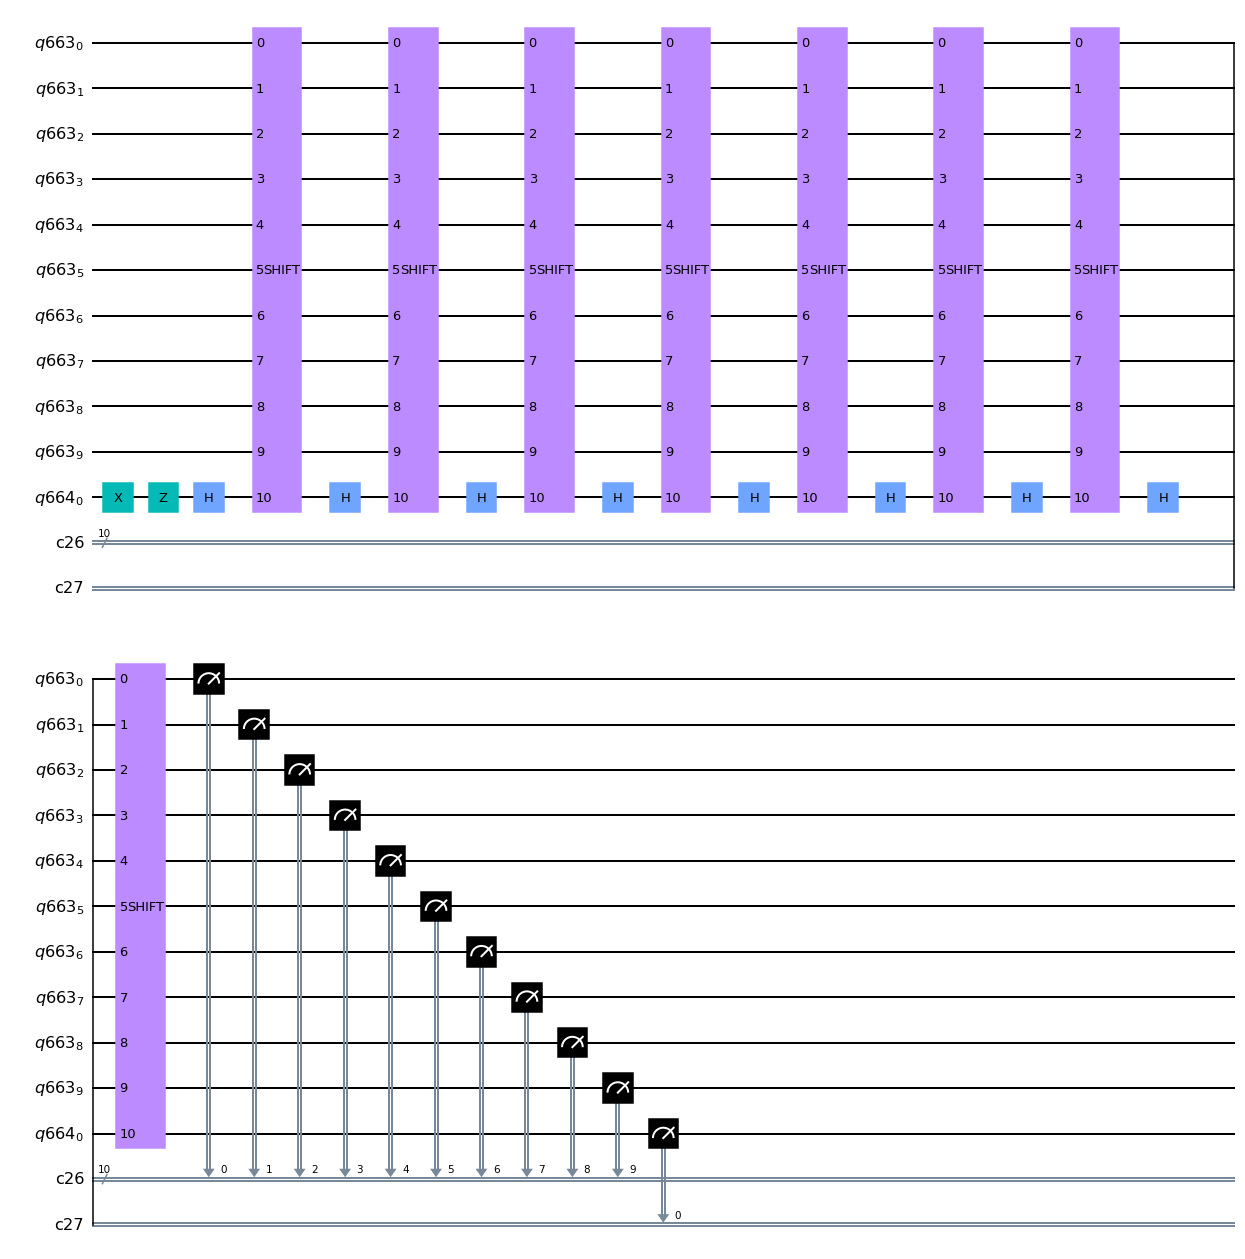

In [59]:
t = 8
n = 10
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

circuit.x(q_coin[:])
circuit.z(q_coin[:])

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

print('n=', n)
circuit.draw(output ='mpl')

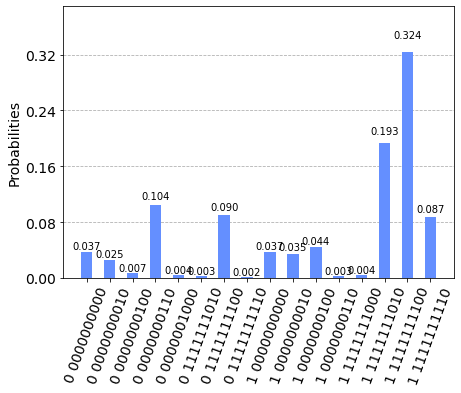

In [60]:
counts = simulate(circuit)
plot_histogram(counts)

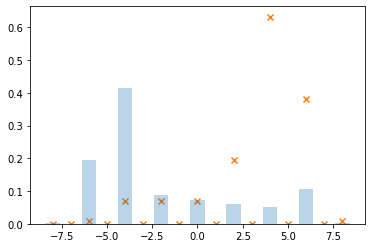

In [63]:
show_dec_bar(t,n,counts)


X=range(-t,t+1)
Y=[(prob(i,t)[0]**2 +prob_1(i,t)[1]**2) for i in range(-t,t+1)]

plt.scatter(X,Y, marker='x')

### Circuit of Coined Walks with balanced coin

n= 5


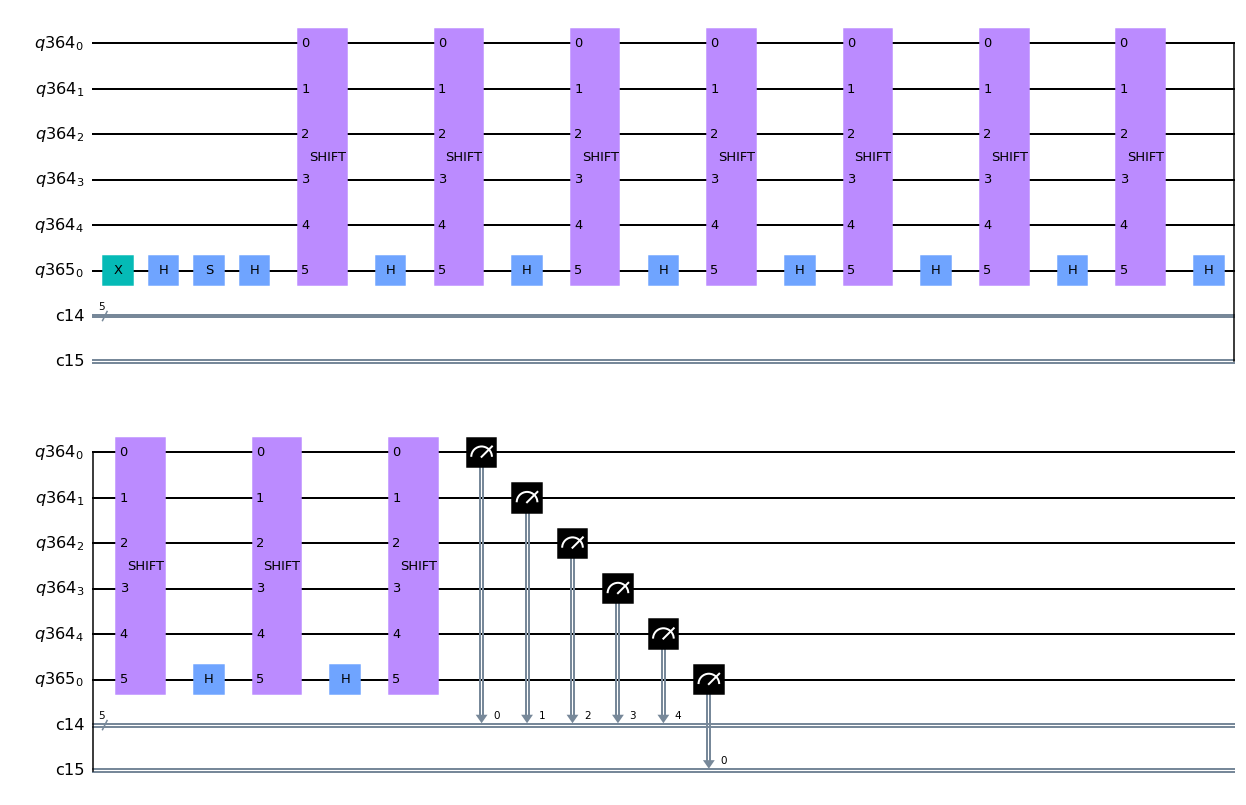

In [30]:
t = 10
n = 5
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(1)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(1)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

circuit.x(q_coin[:])
circuit.h(q_coin[:])
circuit.s(q_coin[:])

for _ in range(t):
    circuit.h(q_coin[0])
    circuit.append(shift_gate(n), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

print('n=', n)
circuit.draw(output ='mpl')

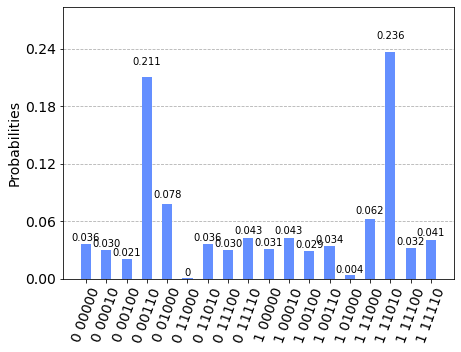

In [34]:
counts = simulate(circuit)
plot_histogram(counts)

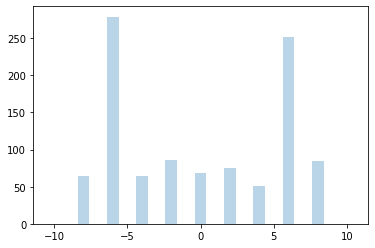

In [35]:
show_dec_bar(t,n,counts)


### Circuit of Coined Walks with Grover's coin

In [36]:
from qiskit.circuit.library import GroverOperator

In [37]:
def grover_shift_gate(n,m):
    q_r = QuantumRegister(n)
    q_c = QuantumRegister(m)
    shift = QuantumCircuit(q_r, q_c)
    
    for i in range(n):
        shift.x(q_c[0])
        if i%2==0:
            shift.x(q_c[1])
        shift.ccx(q_c[0],q_c[1],i)

    
    
    return shift.to_gate(label='SHIFT')

In [47]:
def grover_coin(m):
    
    q_c = QuantumRegister(m)
    coin = QuantumCircuit(q_c)
    
    coin.h(q_c[:])
    coin.z(q_c[:])
    coin.cz(q_c[0],q_c[1])
    coin.h(q_c[:])

    
    
    return coin.to_gate(label='GROVER COIN')

In [95]:
def show_dec_bar(t,n,m,counts):
    x= range(-t, t+1)
    y= [0]*(2*t+1)
    for num in list(counts.keys()) :
        no = int(num[m+1:], base = 2)
        no = no if no<=2**(n-1) else no-(2**n)
        y[no+t]+= counts[num]
    y=np.array(y)/sum(y)

    plt.bar(x,y, alpha = 0.3)
    #plt.show()

n= 3


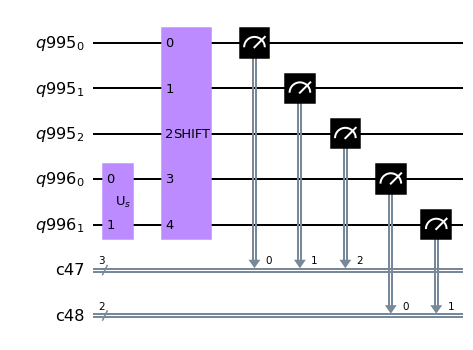

In [103]:
t = 1
n = 3
m = 2
q_reg = QuantumRegister(n)
q_coin = QuantumRegister(m)
c_reg = ClassicalRegister(n)
c_coin = ClassicalRegister(m)

circuit = QuantumCircuit(q_reg, q_coin, c_reg, c_coin )

for _ in range(t):
    # Coin operator
    circuit.append(diffuser(m), q_coin[:])
    
    circuit.append(grover_shift_gate(n,m), q_reg[:] + q_coin[:])

circuit.measure(q_reg, c_reg )
circuit.measure(q_coin, c_coin )

print('n=', n)
circuit.draw(output ='mpl')

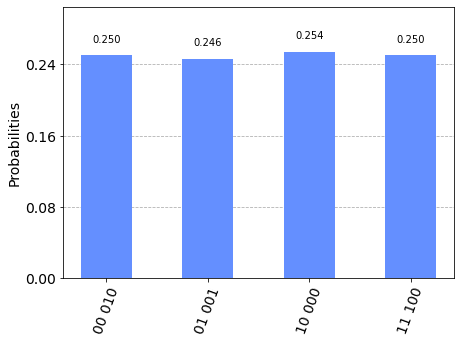

In [104]:
counts = simulate(circuit)
plot_histogram(counts)

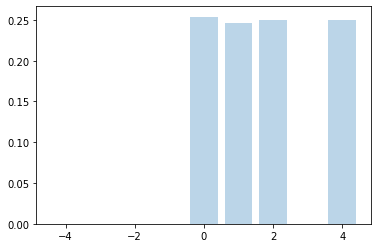

In [105]:
show_dec_bar(2**(n-1),n,m,counts)

## Grover's algorithm

In [182]:
from qiskit.circuit.library import Diagonal
def grover_oracle(n, sol):
    diagonal_elements = [1]*(2**n)
    diagonal_elements[sol]= -1
    oracle = Diagonal(diagonal_elements)
    oracle.name = "O$_{f}$"
    return oracle.to_gate()

In [190]:
def diffuser(n):
    qr = QuantumRegister(n)
    diffuser = QuantumCircuit(qr)
    # Apply transformation |s> -> |00..0> (H-gates)
    diffuser.h(qr[:])
    # Apply transformation |00..0> -> |11..1> (X-gates)
    diffuser.x(qr[:])
    # Do multi-controlled-Z gate
    diffuser.h(qr[-1])
    diffuser.mct(qr[:-1], qr[-1])  # multi-controlled-toffoli
    diffuser.h(qr[-1])
    # Apply transformation |11..1> -> |00..0>
    diffuser.x(qr[:])
    # Apply transformation |00..0> -> |s>
    diffuser.h(qr[:])
    # We will return the diffuser as a gate
    return diffuser.to_gate(label='D')
#diffuser(5).draw(output ='mpl')

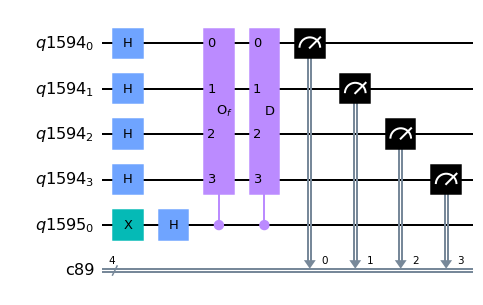

In [191]:
n=4
qr = QuantumRegister(n)
qc = QuantumRegister(1)
cr = ClassicalRegister(n)
circuit = QuantumCircuit(qr ,qc, cr)

circuit.x(qc[:])
circuit.h(qc[:])
circuit.h(qr[:])

oracle = grover_oracle(n, 2).control(1)
circuit.append(oracle, qc[:] + qr[:] )

diffuseur = diffuser(n).control(1)
circuit.append(diffuseur, qc[:] + qr[:])

circuit.measure(qr, cr)
circuit.draw(output ='mpl')

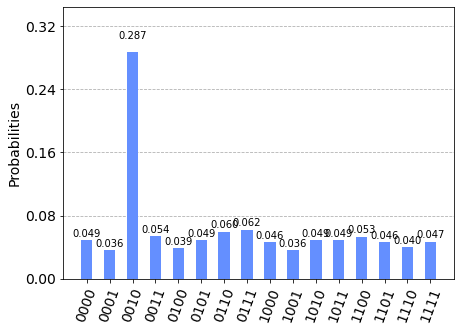

In [192]:
counts = simulate(circuit)
plot_histogram(counts)

<BarContainer object of 16 artists>

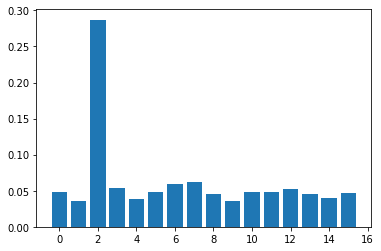

In [193]:
t= 2**(n)
x= range(t)
y= [0]*t
for num in list(counts.keys()) :
    no = int(num, base = 2)
    y[no]+= counts[num]
y = np.array(y)/sum(y)

plt.bar(x,y)